In [1]:
import litebird_sim as lbs
import numpy as np
import matplotlib.pylab as plt
import healpy as hp
from astropy.time import Time

%matplotlib inline

TOAST INFO: mpi4py not found- using serial operations only


In [2]:
telescope = "MFT"
channel = "M1-140"
detlist = [
    "001_002_060_45A_140_T",
]

start_time = Time("2025-01-01T00:00:00")
mission_time_hours = 24

imo_version = "v1.3"

# Resolution of the input maps
nside = 256

In [3]:
# This is the folder where the final report with the results of the simulation will be saved
base_path = ".test"

# This loads the full IMO (not only the version specified by `imo_version`!)
imo = lbs.Imo()

# initializing the simulation
sim = lbs.Simulation(
    base_path=base_path,
    start_time=start_time,
    duration_s=mission_time_hours * 3600.0,
)

In [4]:
# Load the definition of the instrument (LFT)
sim.set_instrument(
    lbs.InstrumentInfo.from_imo(
        imo,
        f"/releases/{imo_version}/satellite/{telescope}/instrument_info",
    )
)

dets = []
for n_det in detlist:
    det = lbs.DetectorInfo.from_imo(
        url=f"/releases/{imo_version}/satellite/{telescope}/{channel}/{n_det}/detector_info",
        imo=imo,
    )
    dets.append(det)

Band is not apodized


In [5]:
# Generate the quaternions describing how the instrument moves in the Ecliptic reference frame
sim.set_scanning_strategy(
    imo_url=f"/releases/{imo_version}/satellite/scanning_parameters/"
)

In [6]:
# creating one observation
sim.create_observations(
    detectors=dets,
    n_blocks_det=1,
    n_blocks_time=1,  # blocks different from one if parallelizing
)

In [7]:
sim.compute_pointings()

In [8]:
sim.add_dipole()
sim.add_noise()

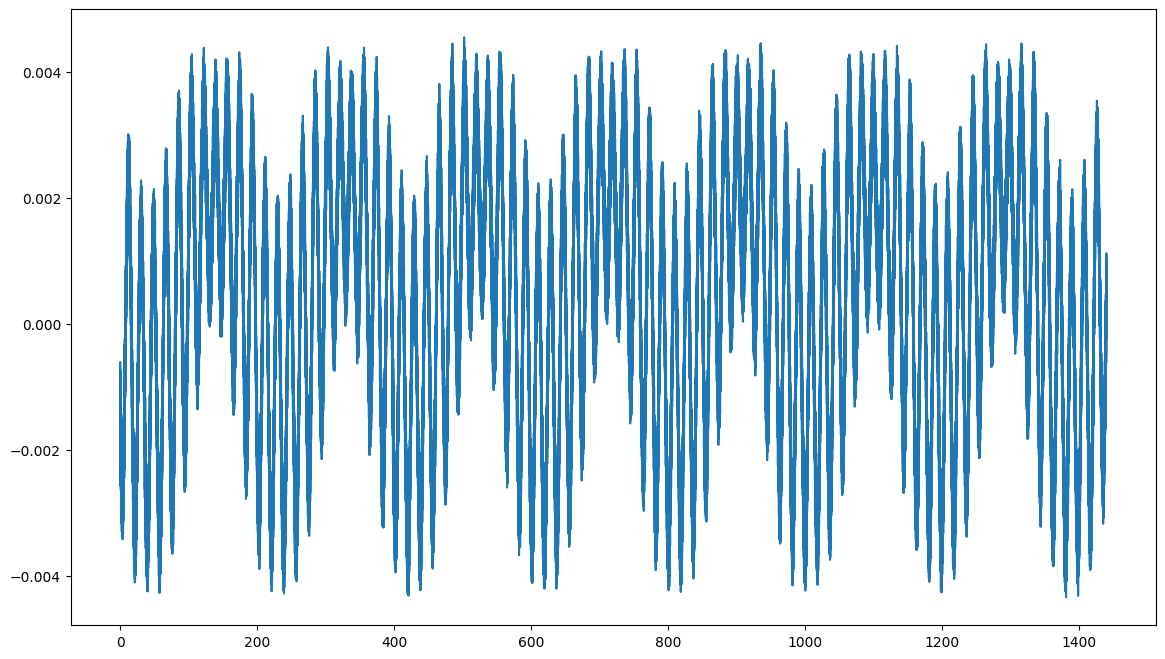

In [9]:
times_min = (
    sim.observations[0].get_times() - sim.observations[0].start_time.cxcsec
) / 60.0
plt.figure(figsize=(14, 8))
plt.plot(times_min, sim.observations[0].tod[0])

In [10]:
sim.apply_non_linearities()

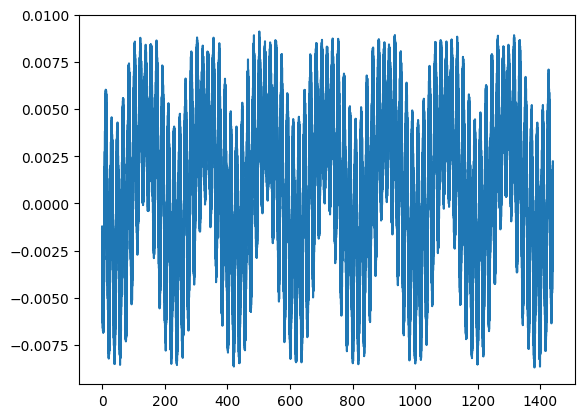

In [11]:
plt.plot(times_min, sim.observations[0].tod[0])